### Moore-Greitzer Compressor Model
The Moore-Greitzer model is an ODE model that de- scribes the compressor and predicts surge instability.

$\begin{aligned} \dot { \Phi } & = - \Psi + \Psi _ { c } + 1 + 3 \Phi / 2 - \Phi ^ { 3 } / 2 \\ \dot { \Psi } & = ( \Phi + 1 - r \sqrt { \Psi } ) / \beta ^ { 2 } \end{aligned}$

where Φ is mass flow, Ψ is pressure rise, β > 0 is a con- stant, and r is the throttle opening.

In [56]:
%matplotlib inline

In [57]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [58]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [76]:
def solve_mgc(N=100, max_time=10.0, psi_c=0.0, beta=1.0, r=0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))


    def mgc_deriv(phi_psi, t0,beta=beta, psi_c=psi_c, r=r):
        """Compute the time-derivative of a Moore Greitzer Compressor model system."""
        phi, psi = phi_psi
        return [-psi+psi_c+1+(3.0/2.0)*phi-0.5*pow(phi,3), \
                (phi + 1 - r)]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 2))
    r0 = np.random.random((N, 1))
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(mgc_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y = x_t[i,:,:].T
        lines = ax.plot(x, y, '-', c=colors[i])
        plt.setp(lines, linewidth=1)

    ax.view_init(1000, beta)
    plt.show()

    return t, x_t



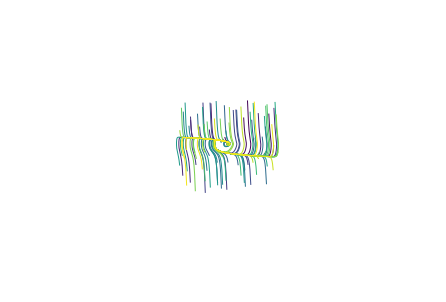

In [77]:
t, x_t = solve_mgc(N=100)

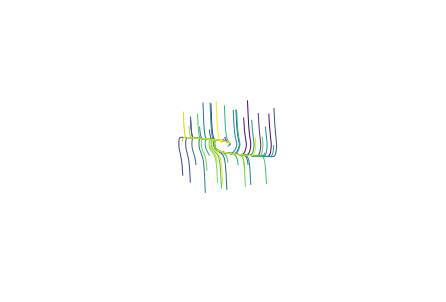

In [78]:
w = interactive(solve_mgc, max_time=(0.1, 4.0),
                N=(0,50), beta=(1.0,50.0), r=(-0.1547, 2.1547))
display(w)



In [62]:
t, x_t = w.result